# Tests Particle Swarm Optimization

In [1]:
# imports
# add folder to syspath to import PSO
import os
import sys
path = os.path.dirname(os.path.dirname(os.path.abspath('')))
sys.path.insert(0, path+'/ParticleSwarmOptimization')
from ParticleSwarmOptimization import ParticleSwarmOptimization

# add folder to syspath to import GA
#sys.path.insert(0, os.path.dirname(path)+'/GeneticAlgorithm')
 # add folder to syspath to import ACO 
#sys.path.insert(0, os.path.dirname(path)+'/AntColonyOptimization')

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# lade die Probleme
# small problem
small_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_objects.npy'))
small_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_container.npy'))
small_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/small_optimal.npy'))
# medium Problem
medium_objects= np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_objects.npy'))
medium_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_container.npy'))
medium_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/medium_optimal.npy'))
# large Problem
large_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_objects.npy'))
large_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_container.npy'))
large_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/large_optimal.npy'))

print('Optimale Lösungen')
print(f'Kleines Problem {small_optimal_solution}')
print(f'Medium Problem {medium_optimal_solution}')
print(f'Großes Problem {large_optimal_solution}')

Optimale Lösungen
Kleines Problem 3
Medium Problem 16
Großes Problem 35


# Average after initializing random (large problem)

39.5 37.0 37.1
11.87239 13.218889999999998 54.037220000000005


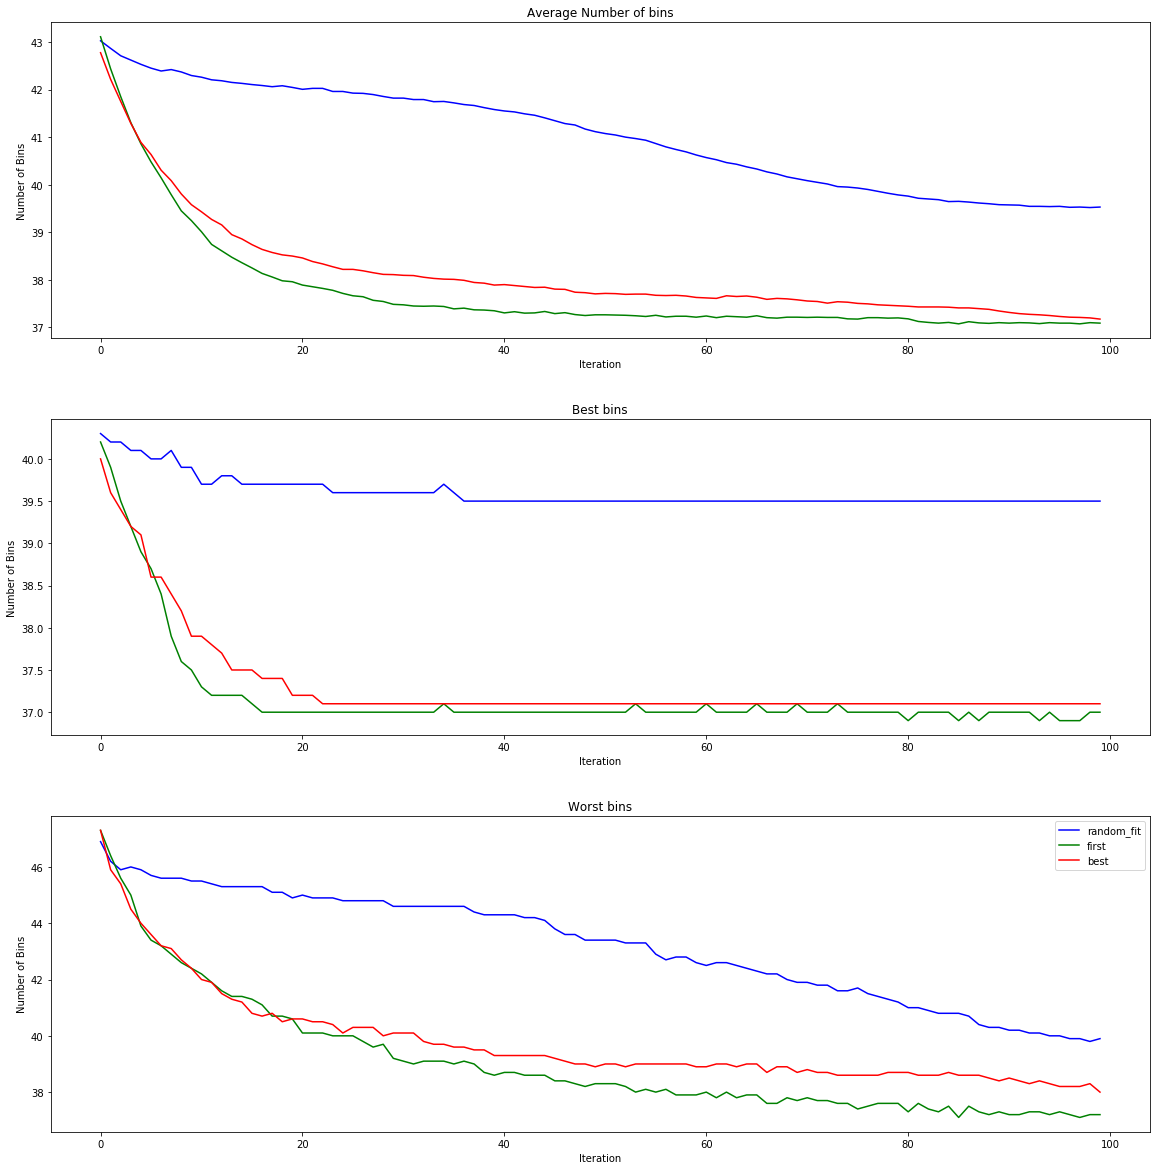

In [3]:
number_tests = 10
iterations = 100
r_solution = np.zeros(number_tests)
f_solution = np.zeros(number_tests)
b_solution = np.zeros(number_tests)
r_runtime = np.zeros(number_tests)
f_runtime = np.zeros(number_tests)
b_runtime = np.zeros(number_tests)
r_average_bins = np.zeros((number_tests, iterations))
f_average_bins = np.zeros((number_tests, iterations))
b_average_bins = np.zeros((number_tests, iterations))
r_best_bins = np.zeros((number_tests, iterations))
f_best_bins = np.zeros((number_tests, iterations))
b_best_bins = np.zeros((number_tests, iterations))
r_worst_bins = np.zeros((number_tests, iterations))
f_worst_bins = np.zeros((number_tests, iterations))
b_worst_bins = np.zeros((number_tests, iterations))

for i in range(number_tests):
    PSO = ParticleSwarmOptimization(large_objects, 20, large_container[0], large_container[1], 0.6, 0.2, 0.01, 7, -0.06, 0.075, 0.0, iterations, 'random', 'random_fit')
    r_solution[i], r_average_bins[i], r_best_bins[i], r_worst_bins[i], r_runtime[i] = PSO.run()
    PSO = ParticleSwarmOptimization(large_objects, 20, large_container[0], large_container[1], 0.6, 0.2, 0.01, 7, -0.06, 0.075, 0.0, iterations, 'random', 'first_fit')
    f_solution[i], f_average_bins[i], f_best_bins[i], f_worst_bins[i], f_runtime[i] = PSO.run()
    PSO = ParticleSwarmOptimization(large_objects, 20, large_container[0], large_container[1], 0.6, 0.2, 0.01, 7, -0.06, 0.075, 0.0, iterations, 'random', 'best_fit')
    b_solution[i], b_average_bins[i], b_best_bins[i], b_worst_bins[i], b_runtime[i] = PSO.run()

average_r_solution = np.average(r_solution, 0)
average_r_runtime = np.average(r_runtime, 0)
average_r_bins = np.average(r_average_bins, 0)
average_r_best = np.average(r_best_bins, 0)
average_r_worst = np.average(r_worst_bins, 0)
average_f_solution = np.average(f_solution, 0)
average_f_runtime = np.average(f_runtime, 0)
average_f_bins = np.average(f_average_bins, 0)
average_f_best = np.average(f_best_bins, 0)
average_f_worst = np.average(f_worst_bins, 0)
average_b_solution = np.average(b_solution, 0)
average_b_runtime = np.average(b_runtime, 0)
average_b_bins = np.average(b_average_bins, 0)
average_b_best = np.average(b_best_bins, 0)
average_b_worst = np.average(b_worst_bins, 0)

print(average_r_solution, average_f_solution, average_b_solution)
print(average_r_runtime, average_f_runtime, average_b_runtime)

x_vals = np.arange(iterations)
fig, ax = plt.subplots(3, figsize=(16,16))
fig.tight_layout(h_pad=6)
ax[0].set_title(f'Average Number of bins')
ax[0].plot(x_vals, average_r_bins, color="blue", label = 'random_fit')
ax[0].plot(x_vals, average_f_bins, color="green", label = 'first')
ax[0].plot(x_vals, average_b_bins, color="red", label = 'best')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title(f'Best bins')
ax[1].plot(x_vals, average_r_best, color="blue", label = 'random_fit')
ax[1].plot(x_vals, average_f_best, color="green", label = 'first')
ax[1].plot(x_vals, average_b_best, color="red", label = 'best')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title(f'Worst bins')
ax[2].plot(x_vals, average_r_worst, color="blue", label = 'random_fit')
ax[2].plot(x_vals, average_f_worst, color="green", label = 'first')
ax[2].plot(x_vals, average_b_worst, color="red", label = 'best')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()

# Average after initializing random (medium problem)

20.1 17.0 17.2
5.847900000000001 5.61141 15.512379999999999


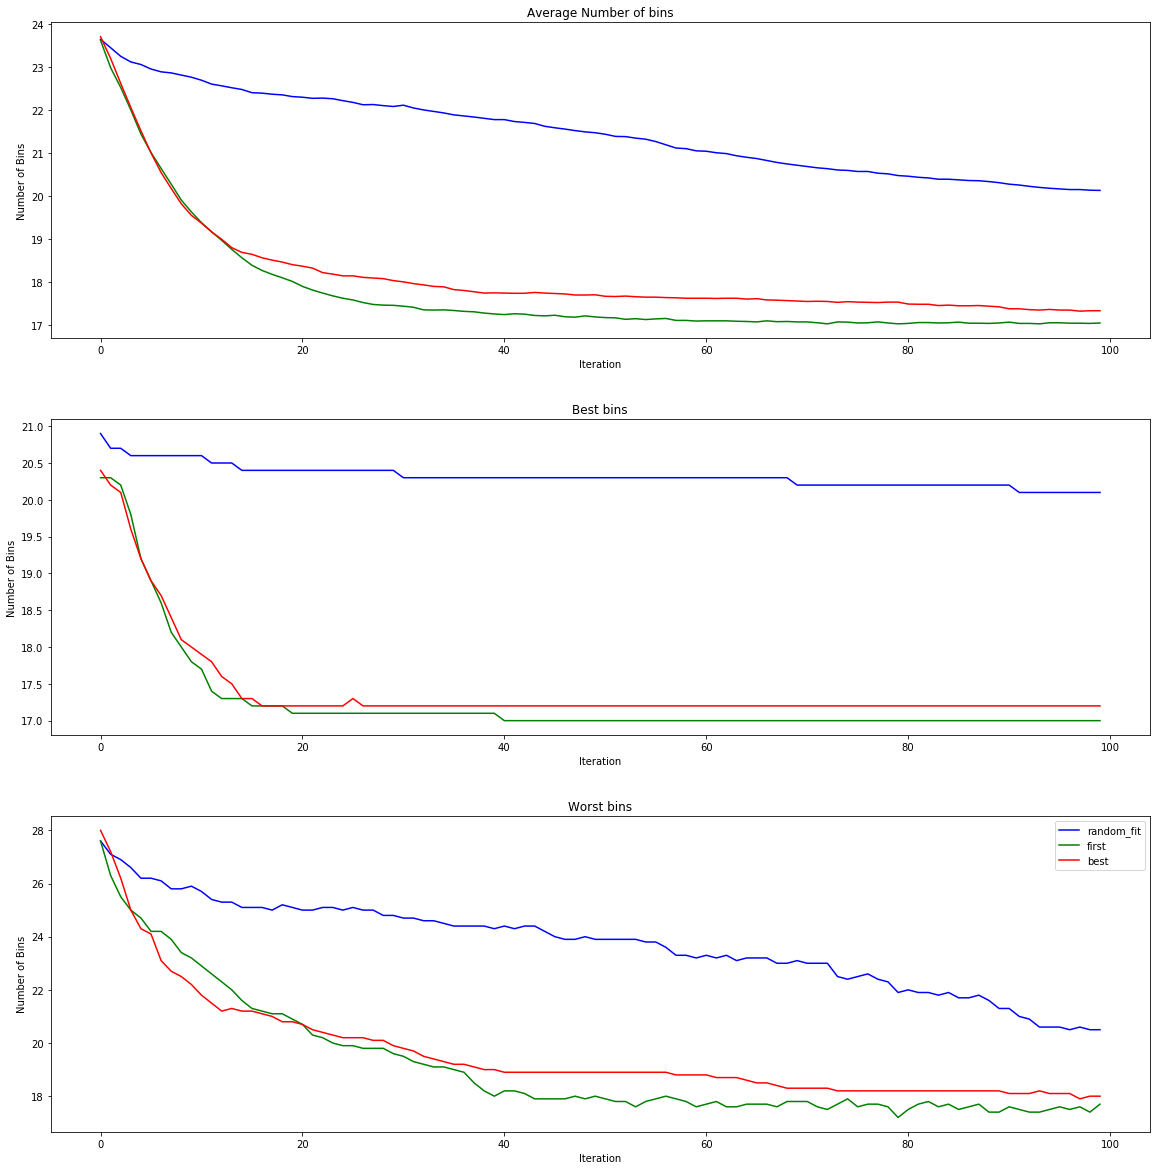

In [4]:
number_tests = 10
iterations = 100
r_solution = np.zeros(number_tests)
f_solution = np.zeros(number_tests)
b_solution = np.zeros(number_tests)
r_runtime = np.zeros(number_tests)
f_runtime = np.zeros(number_tests)
b_runtime = np.zeros(number_tests)
r_average_bins = np.zeros((number_tests, iterations))
f_average_bins = np.zeros((number_tests, iterations))
b_average_bins = np.zeros((number_tests, iterations))
r_best_bins = np.zeros((number_tests, iterations))
f_best_bins = np.zeros((number_tests, iterations))
b_best_bins = np.zeros((number_tests, iterations))
r_worst_bins = np.zeros((number_tests, iterations))
f_worst_bins = np.zeros((number_tests, iterations))
b_worst_bins = np.zeros((number_tests, iterations))

for i in range(number_tests):
    PSO = ParticleSwarmOptimization(medium_objects, 20, medium_container[0], medium_container[1], 0.6, 0.2, 0.01, 7, -0.06, 0.075, 0.0, iterations, 'random', 'random_fit')
    r_solution[i], r_average_bins[i], r_best_bins[i], r_worst_bins[i], r_runtime[i] = PSO.run()
    PSO = ParticleSwarmOptimization(medium_objects, 20, medium_container[0], medium_container[1], 0.6, 0.2, 0.01, 7, -0.06, 0.075, 0.0, iterations, 'random', 'first_fit')
    f_solution[i], f_average_bins[i], f_best_bins[i], f_worst_bins[i], f_runtime[i] = PSO.run()
    PSO = ParticleSwarmOptimization(medium_objects, 20, medium_container[0], medium_container[1], 0.6, 0.2, 0.01, 7, -0.06, 0.075, 0.0, iterations, 'random', 'best_fit')
    b_solution[i], b_average_bins[i], b_best_bins[i], b_worst_bins[i], b_runtime[i] = PSO.run()

average_r_solution = np.average(r_solution, 0)
average_r_runtime = np.average(r_runtime, 0)
average_r_bins = np.average(r_average_bins, 0)
average_r_best = np.average(r_best_bins, 0)
average_r_worst = np.average(r_worst_bins, 0)
average_f_solution = np.average(f_solution, 0)
average_f_runtime = np.average(f_runtime, 0)
average_f_bins = np.average(f_average_bins, 0)
average_f_best = np.average(f_best_bins, 0)
average_f_worst = np.average(f_worst_bins, 0)
average_b_solution = np.average(b_solution, 0)
average_b_runtime = np.average(b_runtime, 0)
average_b_bins = np.average(b_average_bins, 0)
average_b_best = np.average(b_best_bins, 0)
average_b_worst = np.average(b_worst_bins, 0)

print(average_r_solution, average_f_solution, average_b_solution)
print(average_r_runtime, average_f_runtime, average_b_runtime)

x_vals = np.arange(iterations)
fig, ax = plt.subplots(3, figsize=(16,16))
fig.tight_layout(h_pad=6)
ax[0].set_title(f'Average Number of bins')
ax[0].plot(x_vals, average_r_bins, color="blue", label = 'random_fit')
ax[0].plot(x_vals, average_f_bins, color="green", label = 'first')
ax[0].plot(x_vals, average_b_bins, color="red", label = 'best')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel("Number of Bins")
ax[1].set_title(f'Best bins')
ax[1].plot(x_vals, average_r_best, color="blue", label = 'random_fit')
ax[1].plot(x_vals, average_f_best, color="green", label = 'first')
ax[1].plot(x_vals, average_b_best, color="red", label = 'best')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel("Number of Bins")
ax[2].set_title(f'Worst bins')
ax[2].plot(x_vals, average_r_worst, color="blue", label = 'random_fit')
ax[2].plot(x_vals, average_f_worst, color="green", label = 'first')
ax[2].plot(x_vals, average_b_worst, color="red", label = 'best')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel("Number of Bins")
plt.legend()
plt.show()